In [1]:
import glob
from pyskl.smp import *
from pyskl.utils.visualize import Vis3DPose, Vis2DPose
from mmcv import load, dump

c:\Users\Kev\anaconda3\envs\pyskl\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
%cd ..

c:\School\SummerLab\GCN\pyskl


In [15]:
# Download annotations
download_file('http://download.openmmlab.com/mmaction/pyskl/demo/annotations/ntu60_samples_hrnet.pkl', 'ntu60_2d.pkl')
download_file('http://download.openmmlab.com/mmaction/pyskl/demo/annotations/ntu60_samples_3danno.pkl', 'ntu60_3d.pkl')

In [3]:
# Visualize 2D Skeletons without video
annotations = load('ntu60_2d.pkl')
index = 0
anno = annotations[index]
vid = Vis2DPose(anno, thre=0.2, out_shape=(540, 960), layout='coco', fps=12, video=None)
vid.write_videofile("tmp.mp4", remove_temp=True)

100%|██████████| 58/58 [00:00<00:00, 3866.70it/s]


Moviepy - Building video tmp.mp4.
Moviepy - Writing video tmp.mp4



Moviepy - Done !
Moviepy - video ready tmp.mp4


In [5]:
# Visualize 2D Skeletons with the original RGB Video
annotations = load('ntu60_2d.pkl')
index = 0
anno = annotations[index]
frame_dir = anno['frame_dir']
video_url = f"http://download.openmmlab.com/mmaction/pyskl/demo/nturgbd/{frame_dir}.avi"
download_file(video_url, frame_dir + '.avi')
vid = Vis2DPose(anno, thre=0.2, out_shape=(540, 960), layout='coco', fps=12, video=frame_dir + '.avi')
vid.ipython_display()

100%|██████████| 58/58 [00:00<00:00, 3867.01it/s]


Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4


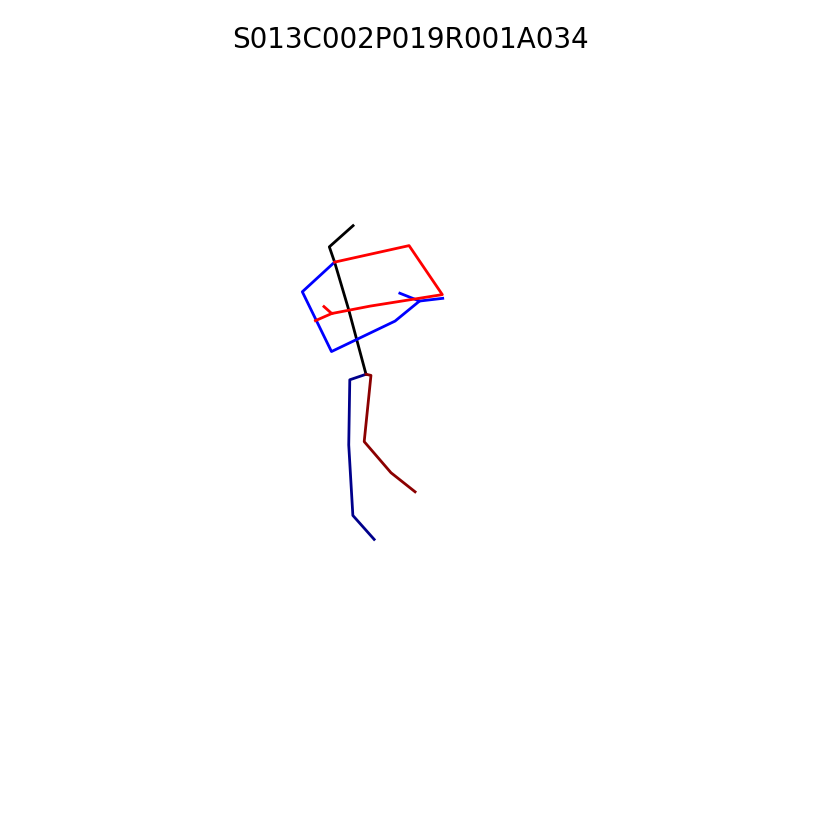

Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4


In [3]:
# Visualize 3D Skeletons
from pyskl.datasets.pipelines import PreNormalize3D
annotations = load('ntu60_3d.pkl')
index = 0
anno = annotations[index]
anno = PreNormalize3D()(anno)  # * Need Pre-Normalization before Visualization
vid = Vis3DPose(anno, layout='nturgb+d', fps=12, angle=(30, 45), fig_size=(8, 8), with_grid=False)
vid.ipython_display()

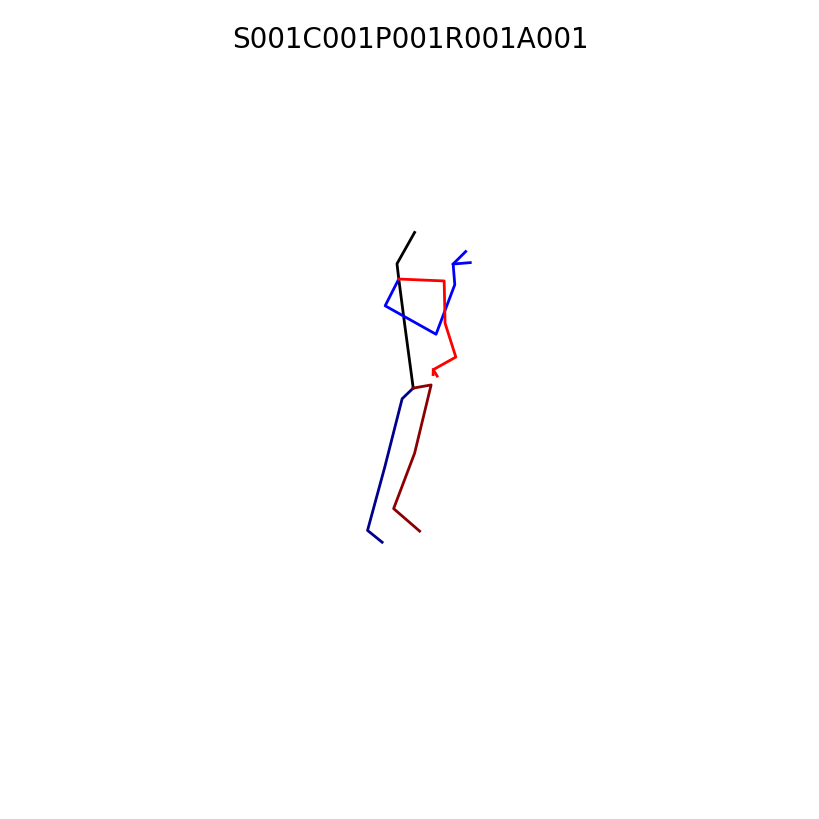

Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4


In [4]:
# Visualize 3D Skeletons
from pyskl.datasets.pipelines import PreNormalize3D
annotations = load('data/nturgbd/ntu60_3danno.pkl')['annotations']
index = 0
anno = annotations[index]
anno = PreNormalize3D()(anno)  # * Need Pre-Normalization before Visualization
vid = Vis3DPose(anno, layout='nturgb+d', fps=12, angle=(30, 45), fig_size=(8, 8), with_grid=False)
vid.ipython_display()

In [ ]:
# Clean directories
os.remove('ntu60_3d.pkl')
os.remove('ntu60_2d.pkl')
for f in glob.glob("S*.avi"):
    os.remove(f)
os.remove('__temp__.mp4')